# <center><b>National Travel Attitudes Study: Wave 9 </b></center>

<center><b> April 2024</b></center>

Data Source: [Department for Transport] (https://www.gov.uk/government/statistics/national-travel-attitudes-study-wave-9)Published
18 January 2024

In [2889]:
!pip install xlrd 

In [2890]:
import pandas as pd
import numpy as np  
import pandas as pd 


import sklearn
import statsmodels.api as sm 

!pip install --upgrade dataframe_image
!pip show dataframe_image
!pip install -u dataframe_image

import seaborn as sns
import matplotlib.pyplot as plt 

import dataframe_image as dfi
from importlib.metadata import version





Name: dataframe-image
Version: 0.2.3
Summary: Embed pandas DataFrames as images in pdf and markdown files when converting from Jupyter Notebooks
Home-page: https://github.com/dexplo/dataframe_image
Author: Ted Petrou
Author-email: petrou.theodore@gmail.com
License: MIT
Location: /Users/levonmcgregor/anaconda3/lib/python3.11/site-packages
Requires: aiohttp, beautifulsoup4, cssutils, html2image, lxml, mistune, nbconvert, packaging, pandas, pillow, requests
Required-by: 

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [2891]:
ntas = pd.read_excel('ntas-wave-9.xlsx',sheet_name=None)

/Users/levonmcgregor/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [2892]:
ntas_bicycles = pd.read_excel('ntas-wave-9.xlsx', sheet_name="NTAS_9b")
ntas_cycling = pd.read_excel('ntas-wave-9.xlsx', sheet_name="NTAS_9c")

>Preparing the ntas_bicycles dataset

In [2893]:
ntas_bicycles.index

RangeIndex(start=0, stop=31, step=1)

In [2894]:

ntas_bicycles = ntas_bicycles.drop(ntas_bicycles.index[:5])



In [2895]:
#creating a new header for analysis 
ntas_bicycles.columns = ntas_bicycles.iloc[0]
ntas_bicycles = ntas_bicycles[1:]
ntas_bicycles = ntas_bicycles.reset_index(drop=True)



In [2896]:
#resettig the index

df = ntas_bicycles.set_index('Question')
df = df.reset_index()
df = df[['Question','Response','Percentage (%)']]


In [2897]:
#renaming a column to remove % sign 

df = df.rename(columns={'Percentage (%)': 'Percentage'})

In [2898]:
#question posed relating to cycling in the Survey

bike_use = df[df['Question'] == 'Excluding any exercise bikes, which of the following best applies to you?']
bike_hire = df[df['Question'] == 'How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?']
bicyle_skill = df[df['Question'] =='How confident do you feel when riding a bicycle?']
cycling_habits = df[df['Question']=='In an average week how often do you travel in the following ways… Cycling.']

###   <center><b>Summary of National Travel Attitudes Study: Wave 9 </b></center>

>Cycle Ownership

In [2899]:
bike_use.style.format(precision=2).background_gradient(cmap='BuGn',subset='Percentage')

5,Question,Response,Percentage
0,"Excluding any exercise bikes, which of the following best applies to you?",Own a bicycle yourself,36.86
1,"Excluding any exercise bikes, which of the following best applies to you?",Have regular use of bicycle owned by someone else,2.27
2,"Excluding any exercise bikes, which of the following best applies to you?",Have no regular use of bicycle,60.76
3,"Excluding any exercise bikes, which of the following best applies to you?",Don't know,0.11


>Bike Hire

In [2900]:
bike_hire.style.format(precision=2).background_gradient(cmap='BuGn',subset='Percentage')

5,Question,Response,Percentage
19,"How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?",3 or more times a week,0.17
20,"How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?",Once or twice a week,0.15
21,"How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?",Once or twice a month,1.62
22,"How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?",A few times a year,4.71
23,"How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?",Never,93.25
24,"How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?",Don't know,0.11


>Cycling Skills

In [2901]:
bicyle_skill.style.format(precision=2).background_gradient(cmap='BuGn',subset='Percentage')

5,Question,Response,Percentage
13,How confident do you feel when riding a bicycle?,Very confident,23.31
14,How confident do you feel when riding a bicycle?,Fairly confident,33.06
15,How confident do you feel when riding a bicycle?,Not very confident,16.74
16,How confident do you feel when riding a bicycle?,Not at all confident,19.73
17,How confident do you feel when riding a bicycle?,I have never ridden a bicycle before,6.67
18,How confident do you feel when riding a bicycle?,Don't know,0.48


>Cycling Habits

In [2902]:
cycling_habits.style.format(precision=2).background_gradient(cmap='BuGn',subset='Percentage')

5,Question,Response,Percentage
4,In an average week how often do you travel in the following ways… Cycling.,Several times a day,1.99
5,In an average week how often do you travel in the following ways… Cycling.,Once a day,1.20
6,In an average week how often do you travel in the following ways… Cycling.,Several times a week,5.69
7,In an average week how often do you travel in the following ways… Cycling.,Once a week,3.40
8,In an average week how often do you travel in the following ways… Cycling.,Once every two weeks,2.52
9,In an average week how often do you travel in the following ways… Cycling.,Once a month,3.50
10,In an average week how often do you travel in the following ways… Cycling.,Less than once a month,11.44
11,In an average week how often do you travel in the following ways… Cycling.,Never,70.08
12,In an average week how often do you travel in the following ways… Cycling.,Don't know,0.17


>"What would encourage you to cycle more [...]"

In [2903]:
display(Binary_style)

,x
0,1
1,2


>"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely'"

In [2904]:
likered_questions = df_likered.style.format(precision=2).background_gradient(cmap='BuGn',subset='Percentage')
likered_questions

5,Question,Response,Percentage
0,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very likely,18
1,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Likely,13
2,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Uncertain,16
3,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Unlikely,11
4,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very unlikely,34
5,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",My area already has enough cycle lanes,11
6,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Don't know,1


### <center><b> Visualisations</b></center>

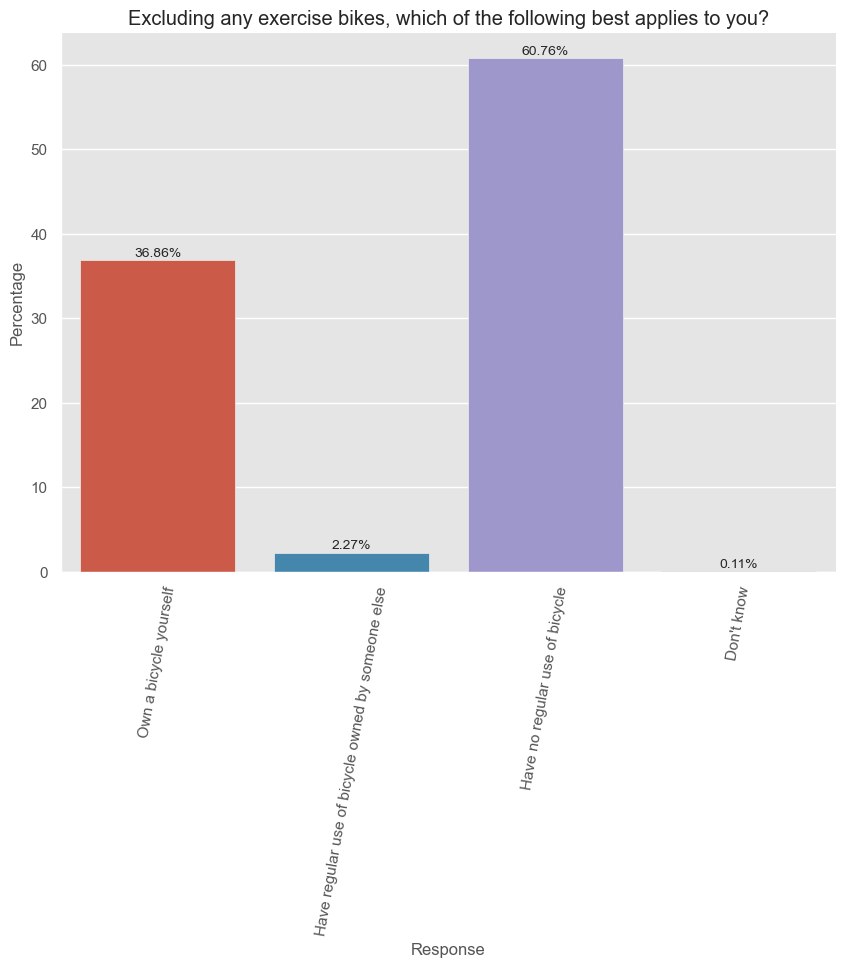

In [2905]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(bike_use))
sns.barplot(x='Response',y='Percentage',data=bike_use, ax=ax)  
# labels for x & y axis
plt.xlabel('Response')
plt.ylabel('Percentage')
sns.despine()

# Iterate over the bars and add the percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f}%',
            ha='center', va='bottom')

plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("Excluding any exercise bikes, which of the following best applies to you?")
plt.show()

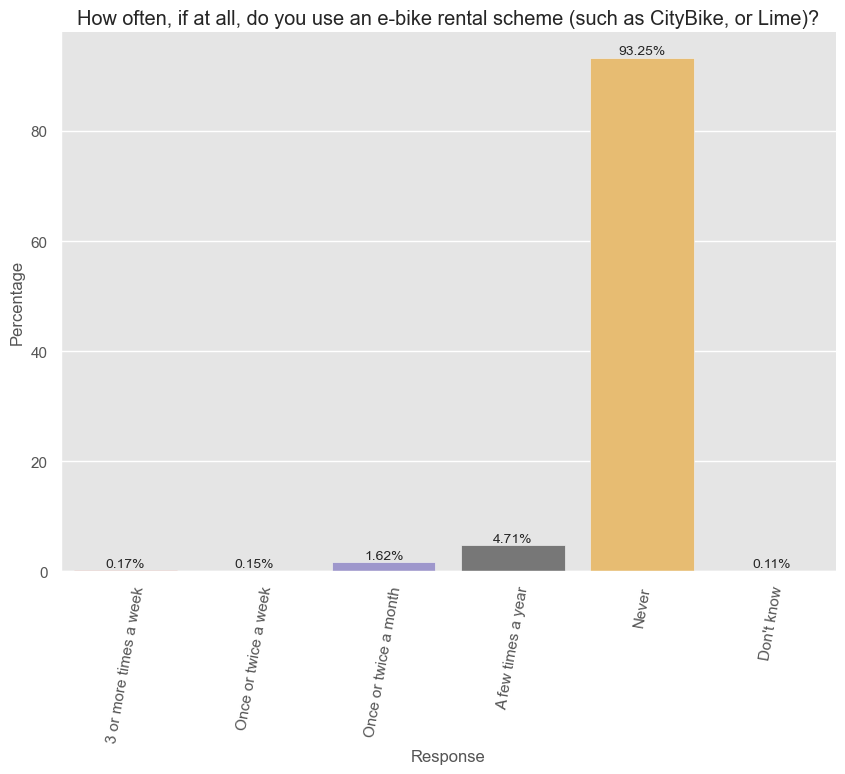

In [2906]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(bike_use))
sns.barplot(x='Response',y='Percentage',data=bike_hire, ax=ax)  
# labels for x & y axis
plt.xlabel('Response')
plt.ylabel('Percentage')
sns.despine()

# Iterate over the bars and add the percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f}%',
            ha='center', va='bottom')

plt.style.use('ggplot')
plt.xticks(rotation=80)
# title of plot
plt.title("How often, if at all, do you use an e-bike rental scheme (such as CityBike, or Lime)?")
plt.show()

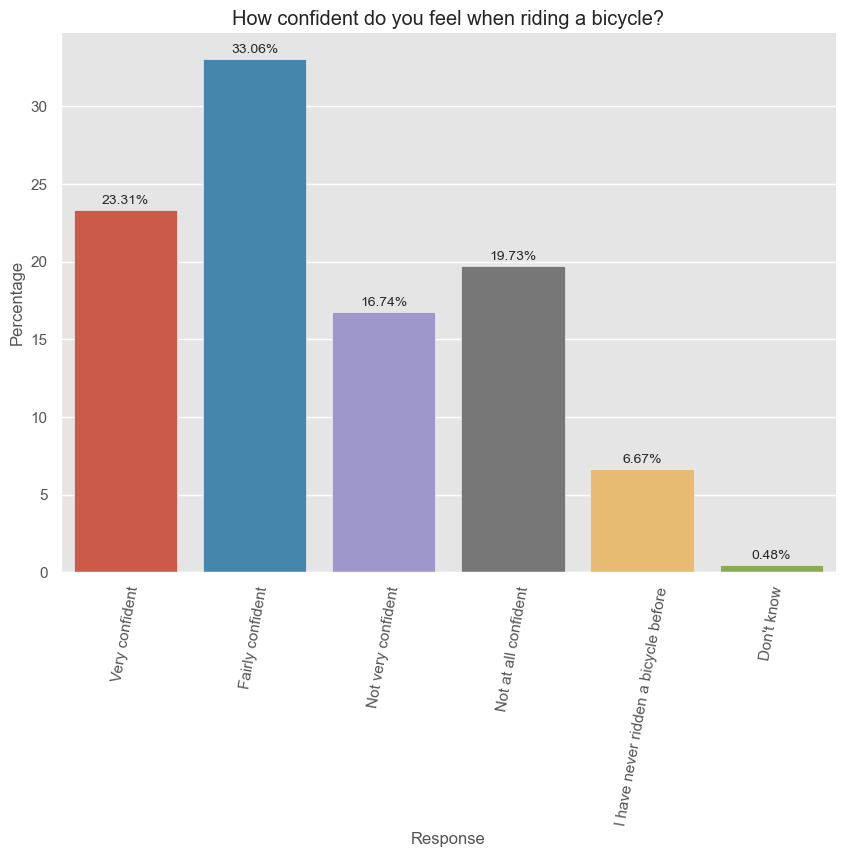

In [2963]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("colorblind", n_colors=len(bike_use))
sns.barplot(x='Response',y='Percentage',data=bicyle_skill, ax=ax)  
# labels for x & y axis
plt.xlabel('Response')
plt.ylabel('Percentage')
sns.despine()

# Iterate over the bars and add the percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.2f}%',
            ha='center', va='bottom')

plt.style.use('ggplot')
plt.xticks(rotation=80)

plt.savefig("df_bicyle_skill.png")


# title of plot
plt.title("How confident do you feel when riding a bicycle?")
plt.show()

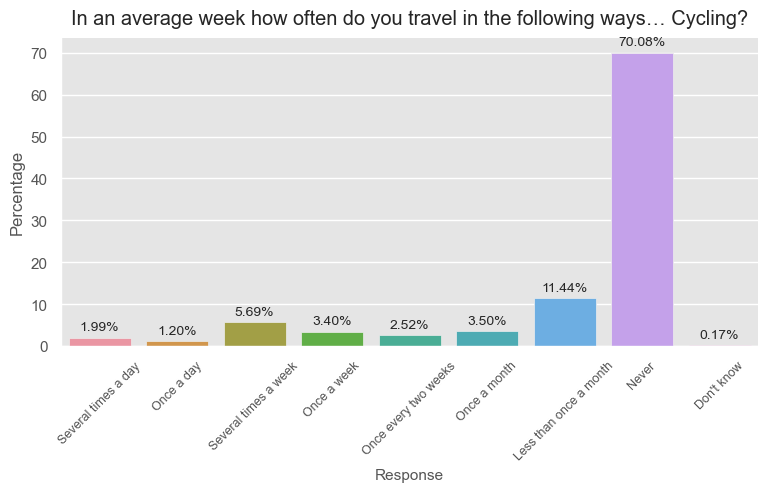

In [2979]:
fig, ax = plt.subplots(figsize=(9, 4))
colors = sns.color_palette("colorblind", n_colors=len(bike_use))
sns.barplot(x='Response',y='Percentage',data=cycling_habits, ax=ax)  
# labels for x & y axis
plt.xlabel('Response', fontsize=11)
plt.ylabel('Percentage')
sns.despine()
sns.plotting_context("notebook")
   

# Iterate over the bars and add the percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.2f}%',
            ha='center', va='bottom')
    
plt.style.use('ggplot')
plt.xticks(rotation=45, fontsize=9)
# title of plot
plt.savefig("df_cycling_freq.png")

plt.title("In an average week how often do you travel in the following ways… Cycling?",pad=10)
plt.show()

>Preparing the National Attitudes Survey Cycling dataset

In [2909]:
#removing the redundant rows 
ntas_cycling = ntas_cycling.drop(ntas_cycling.index[:5])


In [2910]:
#creating new header for the dataframe 
ntas_cycling.head(3)

,NTAS_9c: What would encourage respondents to cycle more,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
5,Question,Question asked of,Response,Percentage (%),Unweighted sample size (Response),Unweighted sample size (Question asked of),Notes
6,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",All respondents,Very likely,17.01115,343,2004,[Note 1]
7,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",All respondents,Likely,12.40601,232,2004,[Note 1]


In [2911]:
#creating a fresh header for the dataframe

ntas_cycling.columns = ntas_cycling.iloc[0]
ntas_cycling = ntas_cycling[1:]
ntas_cycling = ntas_cycling.reset_index(drop=True)
ntas_cycling.head(3)



5,Question,Question asked of,Response,Percentage (%),Unweighted sample size (Response),Unweighted sample size (Question asked of),Notes
0,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",All respondents,Very likely,17.01115,343,2004,[Note 1]
1,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",All respondents,Likely,12.40601,232,2004,[Note 1]
2,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",All respondents,Uncertain,15.738376,298,2004,[Note 1]


In [2912]:
#renaming a column to remove % sign 

ntas_cycling = ntas_cycling.rename(columns={'Percentage (%)': 'Percentage'})
ntas_cycling.columns

Index(['Question', 'Question asked of', 'Response', 'Percentage',
       'Unweighted sample size (Response)',
       'Unweighted sample size (Question asked of)', 'Notes'],
      dtype='object', name=5)

In [2913]:
ntas_cycling['Percentage'] = ntas_cycling['Percentage'].astype(float)

In [2914]:
#formatting column with a % sign and rounding to 2 decimal places

#ntas_cycling['Percentage'] = (ntas_cycling['Percentage'].round(2))   
import math
# round the numbers up to the nearest integer
ntas_cycling['Percentage'] = ntas_cycling['Percentage'].apply(lambda x: math.ceil(x))
                    

In [2915]:
#resetting index and subsetting the dataframe 

df = ntas_cycling.set_index('Question')
df = df.reset_index()
df = df[['Question','Response','Percentage']]

In [2916]:
xy = df.copy()

In [2917]:
df

5,Question,Response,Percentage
0,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very likely,18
1,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Likely,13
2,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Uncertain,16
3,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Unlikely,11
4,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very unlikely,34
5,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",My area already has enough cycle lanes,11
6,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Don't know,1
7,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads",No,39
8,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads",Yes,62
9,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Off-road and segregated cycle paths",No,48


In [2918]:
#question posed relating to cycling habits in the Survey

cycle_lanes = df[df['Question'] == 'On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?']
safer_roads = df[df['Question'] == 'We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads']
segr_c_paths = df[df['Question'] =='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Off-road and segregated cycle paths']
cycle_routes = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: More direct cycle routes']
knowing_routes = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Raise awareness of local cycle routes']
secure_storage = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Secure storage or parking at work or home']
wrk_showers = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Access to showers or changing facilities at work']
rd_surface = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Well-maintained road surfaces for cycling']
sign_low_traff = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Visible signposting of low-traffic cycle routes']
training = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Training to help me ride a bike or increase my confidence']
repair_courses = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cycle maintenance or repair courses']
hire_facilities = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Better bicycle hire facilities']
cheaper_hire = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles to hire']
cheaper_purch = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles available to buy']
other = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Other']
NOTA = df[df['Question']=='We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: None of the above']
dont_know = df[df['Question']=='''We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Don't know''']

In [2919]:
#sense checking example

safer_roads

5,Question,Response,Percentage
7,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads",No,39
8,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads",Yes,62


#### Cyle Lanes

In [2920]:
cycle_lanes.set_index('Response')


5,Question,Percentage
Response,,
Very likely,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",18
Likely,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",13
Uncertain,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",16
Unlikely,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",11
Very unlikely,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",34
My area already has enough cycle lanes,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",11
Don't know,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",1


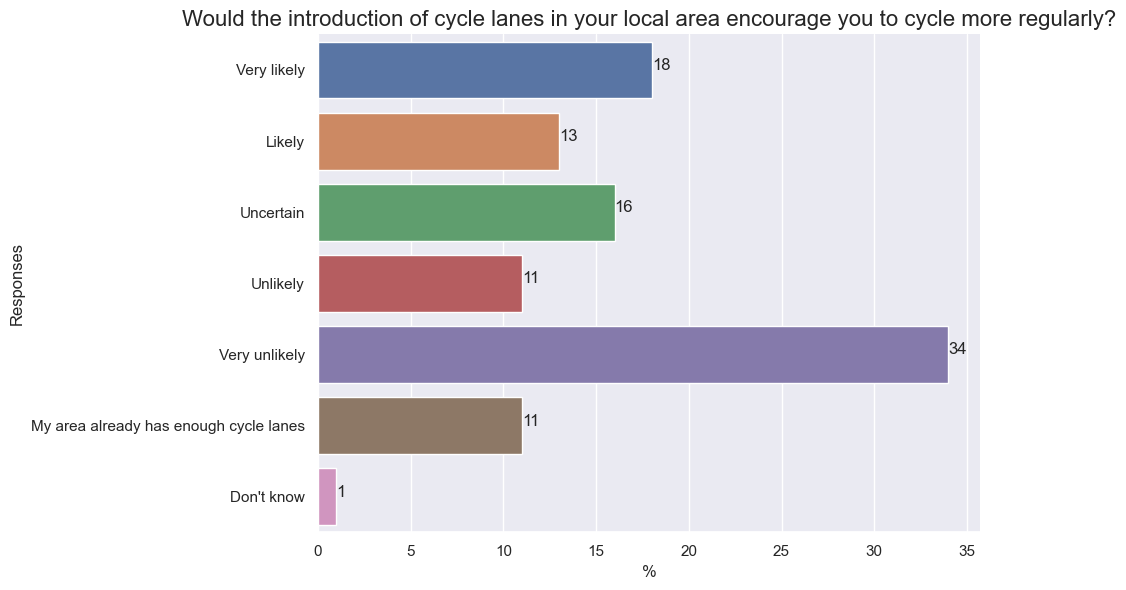

<Figure size 1000x600 with 0 Axes>

In [2921]:
sns.set(rc={"figure.figsize":(10, 6)})
colors = sns.color_palette("colorblind", n_colors=len(cycle_lanes))


#create horizontal bar chart
plot = sns.barplot(x=cycle_lanes.Percentage, y=cycle_lanes.Response, orient='h')


#add plot title
plt.title('Would the introduction of cycle lanes in your local area encourage you to cycle more regularly?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()

# Annotate each bar with the value of Sales
for index, value in enumerate(cycle_lanes.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("cycle_lanes.pdf")

#### Safer Roads

In [2922]:
safer_roads.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads",39
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Safer roads",62


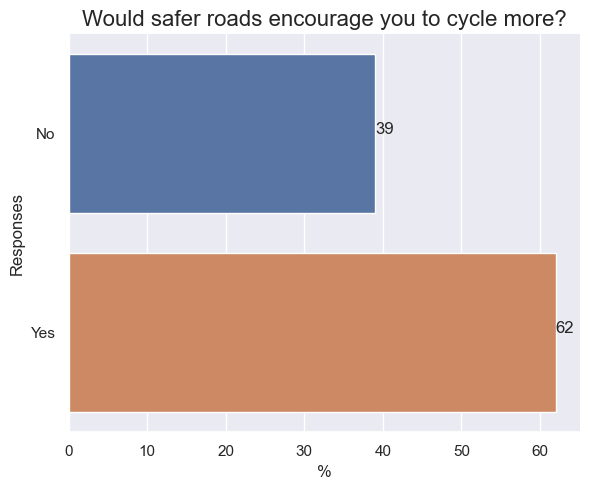

<Figure size 600x500 with 0 Axes>

In [2923]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(safer_roads))


#create horizontal bar chart
plot = sns.barplot(x=safer_roads.Percentage, y=safer_roads.Response, orient='h')

# Annotate each bar with the value of Sales
for index, value in enumerate(safer_roads.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would safer roads encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("safer_roads.pdf")

#### Segregated Cyle Paths

In [2924]:
segr_c_paths.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Off-road and segregated cycle paths",48
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Off-road and segregated cycle paths",53


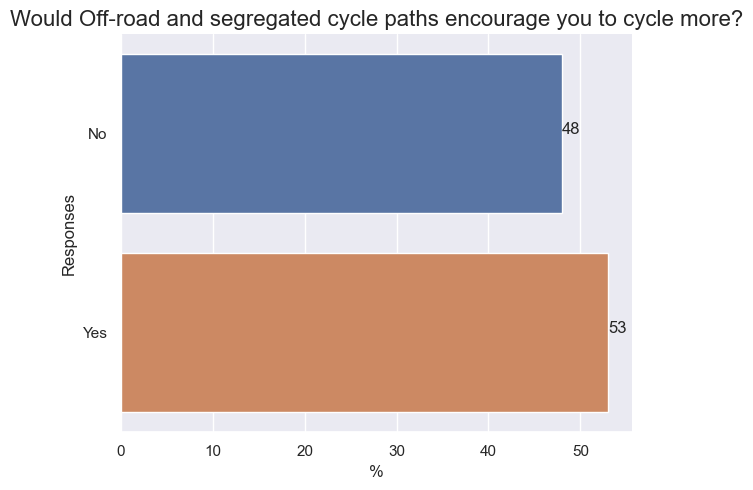

<Figure size 600x500 with 0 Axes>

In [2925]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(segr_c_paths))


#create horizontal bar chart
plot = sns.barplot(x=segr_c_paths.Percentage, y=segr_c_paths.Response, orient='h')

# Annotate each bar with the value of Sales
for index, value in enumerate(segr_c_paths.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would Off-road and segregated cycle paths encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("segr_c_paths.pdf")

#### Cycle Routes

In [2926]:
cycle_routes.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: More direct cycle routes",59
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: More direct cycle routes",42


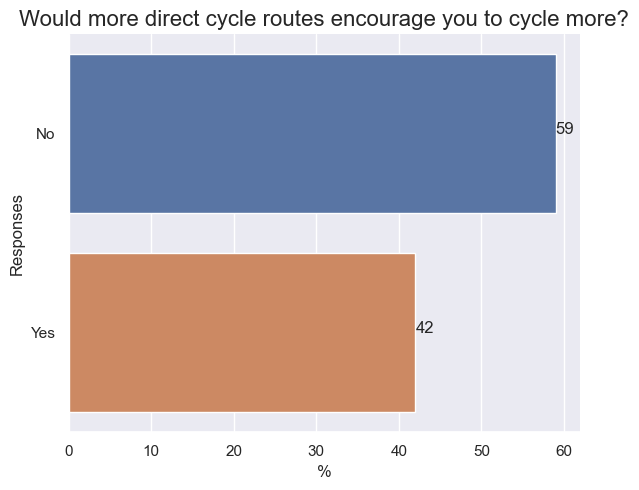

<Figure size 600x500 with 0 Axes>

In [2927]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(cycle_routes))


#create horizontal bar chart
plot = sns.barplot(x=cycle_routes.Percentage, y=cycle_routes.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(cycle_routes.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would more direct cycle routes encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("cycle_routes.pdf")

#### Knowing where the cycle highways are located 

In [2928]:
knowing_routes.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Raise awareness of local cycle routes",70
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Raise awareness of local cycle routes",31


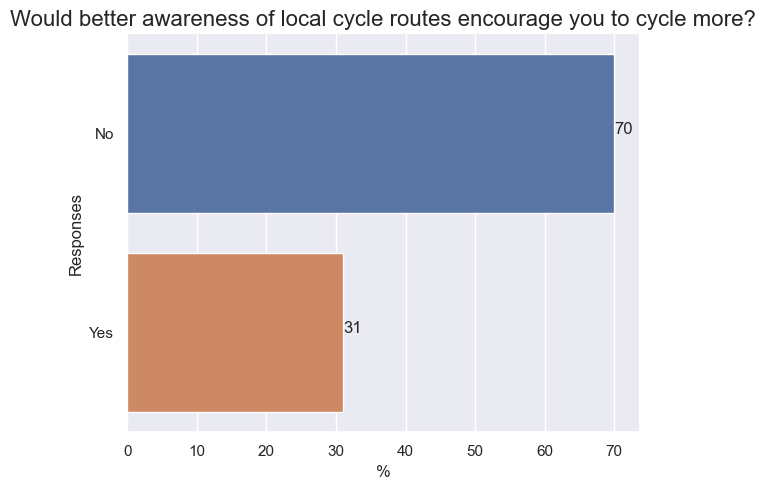

<Figure size 600x500 with 0 Axes>

In [2929]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(knowing_routes))


#create horizontal bar chart
plot = sns.barplot(x=knowing_routes.Percentage, y=knowing_routes.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(knowing_routes.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Would better awareness of local cycle routes encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("knowing_routes.pdf")

#### Secure Storage at home and at work

In [2930]:
secure_storage.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Secure storage or parking at work or home",71
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Secure storage or parking at work or home",30


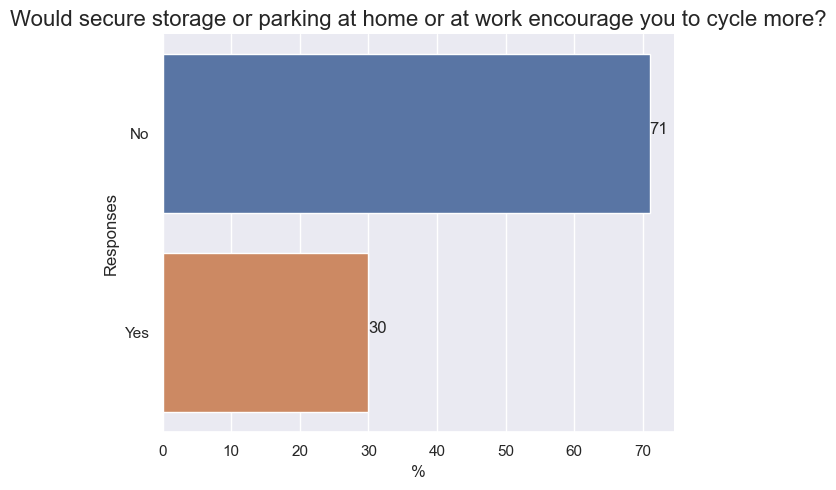

<Figure size 600x500 with 0 Axes>

In [2931]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(secure_storage))


#create horizontal bar chart
plot = sns.barplot(x=secure_storage.Percentage, y=secure_storage.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(secure_storage.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would secure storage or parking at home or at work encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("secure_storage.pdf")

#### Work Showers

In [2932]:
wrk_showers.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Access to showers or changing facilities at work",82
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Access to showers or changing facilities at work",19


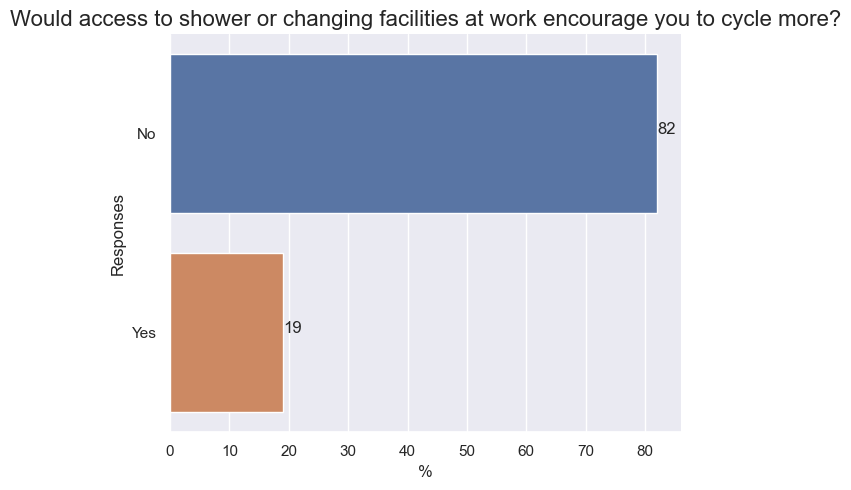

<Figure size 600x500 with 0 Axes>

In [2933]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(wrk_showers))


#create horizontal bar chart
plot = sns.barplot(x=wrk_showers.Percentage, y=wrk_showers.Response, orient='h')

# Annotate each bar with the value of Sales
for index, value in enumerate(wrk_showers.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would access to shower or changing facilities at work encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("wrk_showers.pdf")

#### Road Service

In [2934]:
rd_surface.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Well-maintained road surfaces for cycling",49
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Well-maintained road surfaces for cycling",52


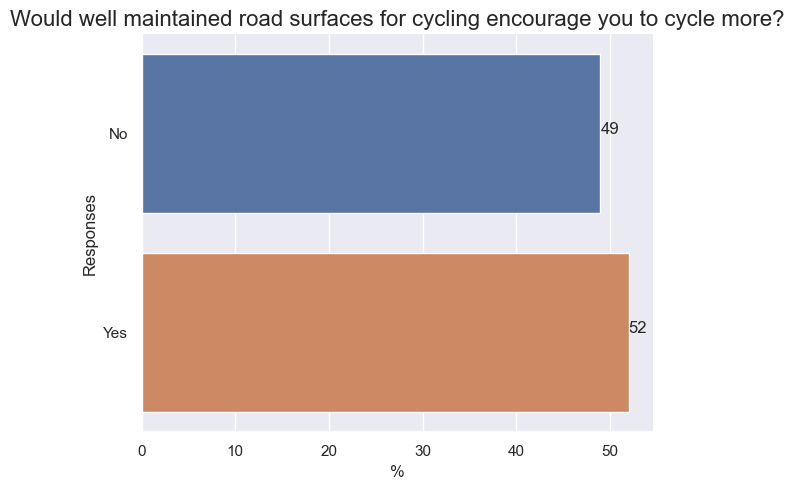

<Figure size 600x500 with 0 Axes>

In [2935]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(rd_surface))


#create horizontal bar chart
plot = sns.barplot(x=rd_surface.Percentage, y=rd_surface.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(rd_surface.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would well maintained road surfaces for cycling encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("rd_surface.pdf")

#### Signage 

In [2936]:
sign_low_traff.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Visible signposting of low-traffic cycle routes",74
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Visible signposting of low-traffic cycle routes",27


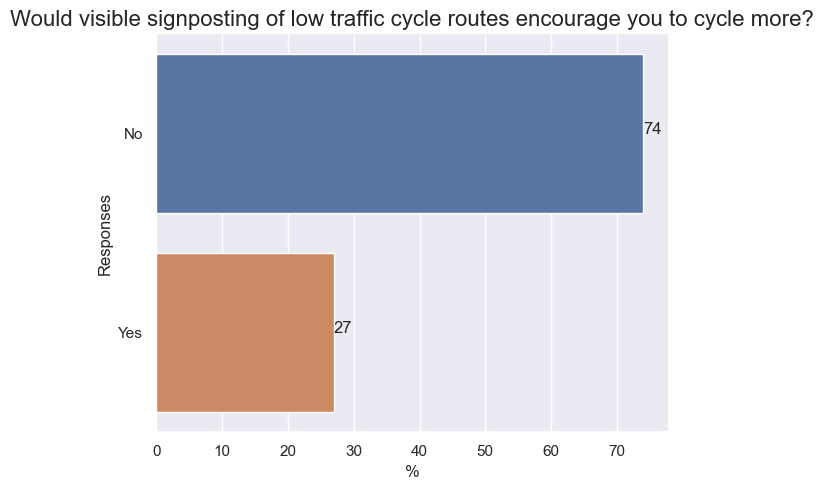

<Figure size 600x500 with 0 Axes>

In [2937]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(sign_low_traff))


#create horizontal bar chart
plot = sns.barplot(x=sign_low_traff.Percentage, y=sign_low_traff.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(sign_low_traff.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))

#add plot title
plt.title('Would visible signposting of low traffic cycle routes encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("sign_low_traff.pdf")

#### Training 

In [2938]:
training.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Training to help me ride a bike or increase my confidence",87
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Training to help me ride a bike or increase my confidence",14


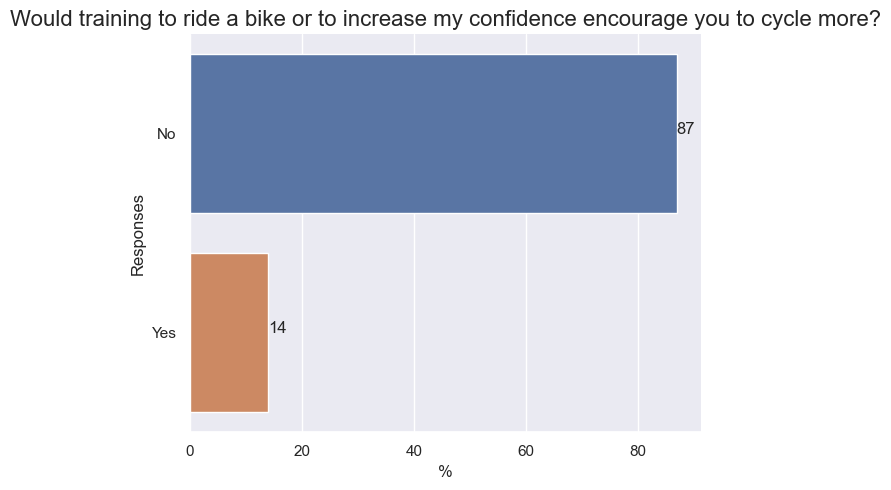

<Figure size 600x500 with 0 Axes>

In [2939]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(training))


#create horizontal bar chart
plot = sns.barplot(x=training.Percentage, y=training.Response, orient='h')

# Annotate each bar with the value of Sales
for index, value in enumerate(training.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Would training to ride a bike or to increase my confidence encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("training.pdf")

#### Repair Courses

In [2940]:
repair_courses.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cycle maintenance or repair courses",87
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cycle maintenance or repair courses",14


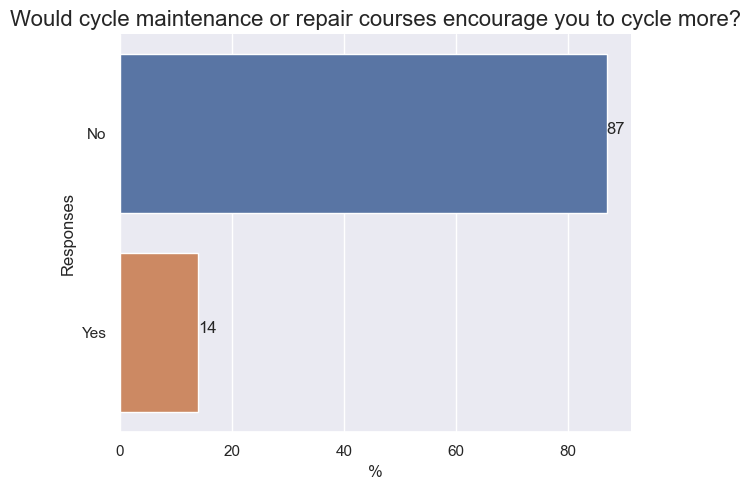

<Figure size 600x500 with 0 Axes>

In [2941]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(repair_courses))


#create horizontal bar chart
plot = sns.barplot(x=repair_courses.Percentage, y=repair_courses.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(repair_courses.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Would cycle maintenance or repair courses encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("repair_courses.pdf")

#### Hire Facilities 

In [2942]:
hire_facilities.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Better bicycle hire facilities",89
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Better bicycle hire facilities",12


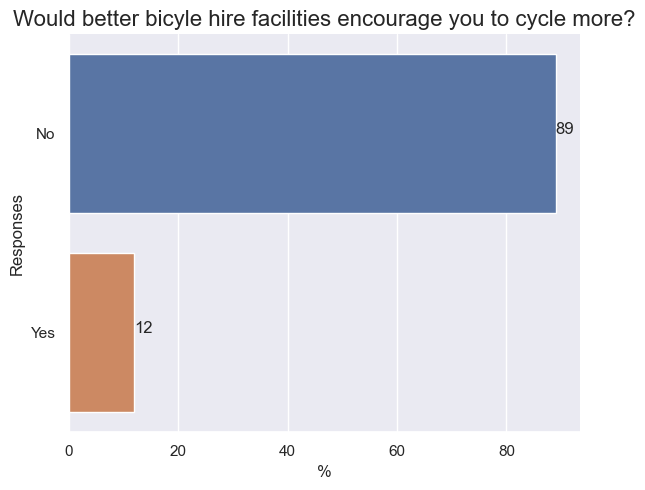

<Figure size 600x500 with 0 Axes>

In [2943]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(hire_facilities))


#create horizontal bar chart
plot = sns.barplot(x=hire_facilities.Percentage, y=hire_facilities.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate (hire_facilities.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Would better bicyle hire facilities encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("hire_facilities.pdf")

#### Cheaper Hire

In [2944]:
cheaper_hire.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles to hire",84
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles to hire",17


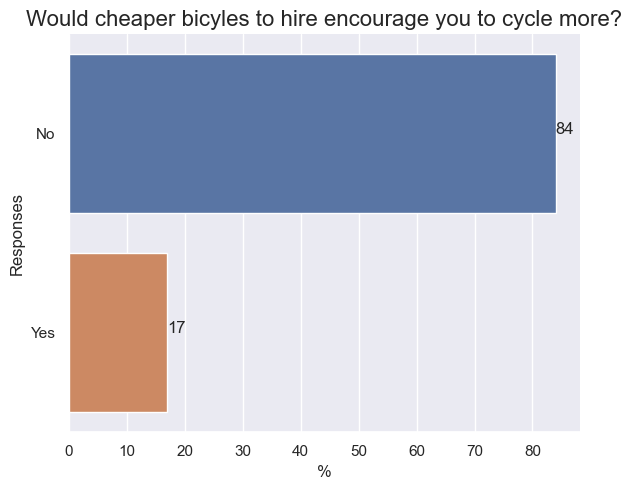

<Figure size 600x500 with 0 Axes>

In [2945]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(cheaper_hire))


#create horizontal bar chart
plot = sns.barplot(x=cheaper_hire.Percentage, y=cheaper_hire.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(cheaper_hire.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Would cheaper bicyles to hire encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("cheaper_hire.pdf")

#### Cheaper Purchase Prices

In [2946]:
cheaper_purch.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles available to buy",73
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles available to buy",28


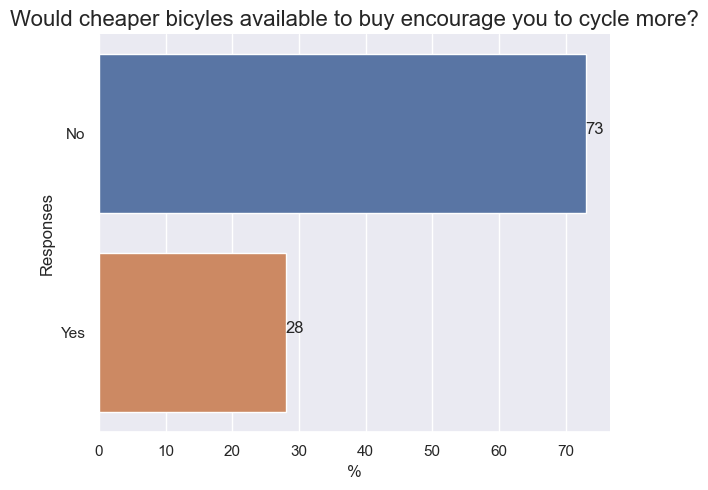

<Figure size 600x500 with 0 Axes>

In [2947]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(cheaper_purch))


#create horizontal bar chart
plot = sns.barplot(x=cheaper_purch.Percentage, y=cheaper_purch.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(cheaper_purch.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Would cheaper bicyles available to buy encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("cheaper_purch.pdf")

#### Other

In [2948]:
other.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Other",96
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Other",5


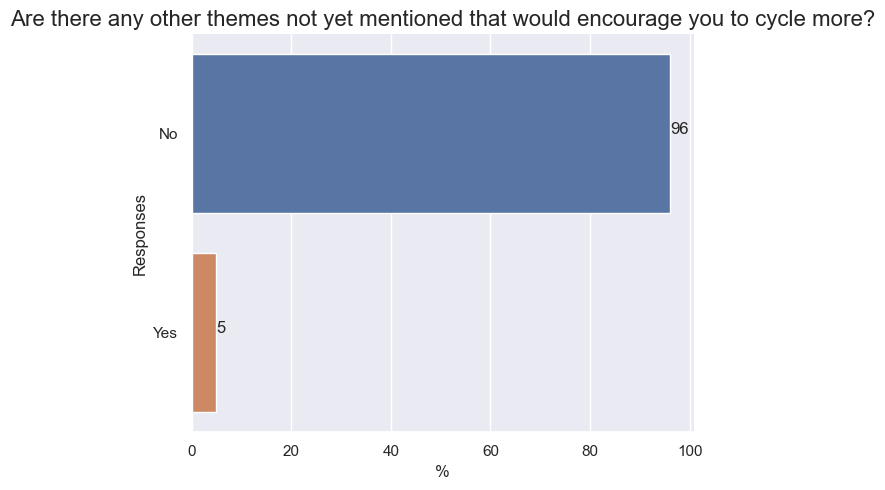

<Figure size 600x500 with 0 Axes>

In [2949]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(other))


#create horizontal bar chart
plot = sns.barplot(x=other.Percentage, y=other.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(other.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('Are there any other themes not yet mentioned that would encourage you to cycle more?', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("other.pdf")

#### Not Any of The Above 

In [2950]:
NOTA.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: None of the above",85
Yes,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: None of the above",16


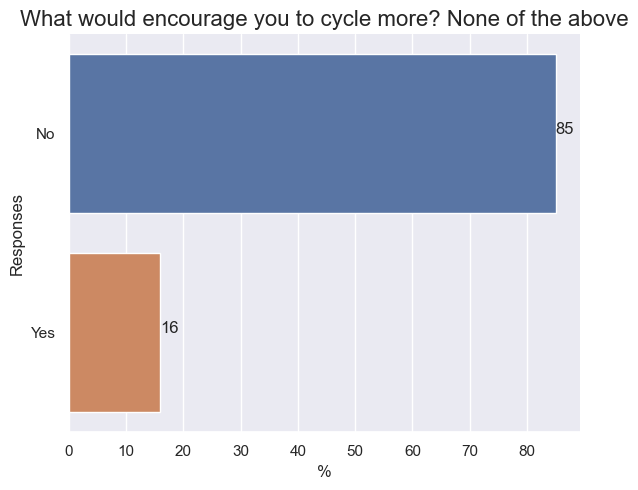

<Figure size 600x500 with 0 Axes>

In [2951]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(NOTA))


#create horizontal bar chart
plot = sns.barplot(x=NOTA.Percentage, y=NOTA.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(NOTA.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('What would encourage you to cycle more? None of the above', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("NOTA.pdf")

#### Don't Know 

In [2952]:
dont_know.set_index('Response')

5,Question,Percentage
Response,,
No,"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Don't know",100


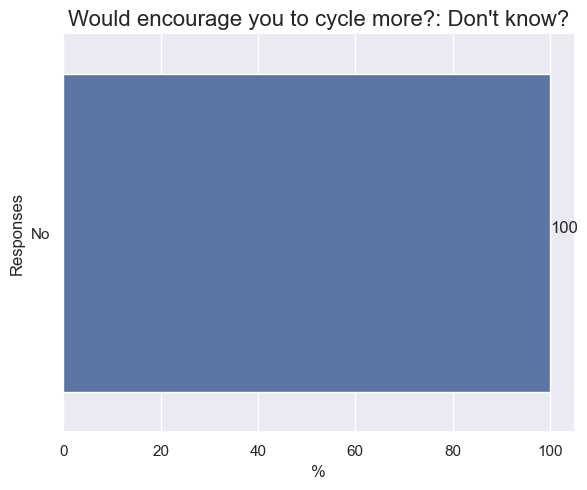

<Figure size 600x500 with 0 Axes>

In [2953]:
sns.set(rc={"figure.figsize":(6, 5)})
colors = sns.color_palette("colorblind", n_colors=len(dont_know))


#create horizontal bar chart
plot = sns.barplot(x=dont_know.Percentage, y=dont_know.Response, orient='h')


# Annotate each bar with the value of Sales
for index, value in enumerate(dont_know.set_index('Response')['Percentage']):
    plt.text(value, index, str(value))


#add plot title
plt.title('''Would encourage you to cycle more?: Don't know?''', fontsize=16)

#add axis labels
plt.xlabel('%')
plt.ylabel('Responses')


sns.plotting_context("notebook")
sns.despine()


#for index, value in enumerate(y):
    #plt.text(value, index,
             #str(value))

plt.style.use('ggplot')

plt.tight_layout()

plt.show()
plt.savefig("dont_know.pdf")

In [2954]:
df.head()

5,Question,Response,Percentage
0,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very likely,18
1,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Likely,13
2,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Uncertain,16
3,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Unlikely,11
4,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very unlikely,34


In [2955]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Question    38 non-null     object
 1   Response    38 non-null     object
 2   Percentage  38 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


*For display ealier in the notebook*

In [2956]:

df_binary = df = df.iloc[7:, :]
df_binary
pivoted = df_binary.pivot(index='Question', columns='Response', values='Percentage')
pivoted
#styled binary dataframe with colour 

Binary_style = pivoted.style.format(precision=2).background_gradient(cmap='YlOrRd',subset='No')\
.format(precision=2).background_gradient(cmap='BuGn',subset='Yes')
Binary_style

Response,No,Yes
Question,,
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Access to showers or changing facilities at work",82.00,19.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Better bicycle hire facilities",89.00,12.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles available to buy",73.00,28.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cheaper bicycles to hire",84.00,17.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Cycle maintenance or repair courses",87.00,14.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Don't know",100.00,nan
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: More direct cycle routes",59.00,42.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: None of the above",85.00,16.00
"We know there are many reasons preventing people from cycling or cycling more, which of the following, if any, would encourage you to cycle more?: Off-road and segregated cycle paths",48.00,53.00


In [2957]:
likered_questions = df_likered.style.format(precision=2).background_gradient(cmap='BuGn',subset='Percentage')
likered_questions

5,Question,Response,Percentage
0,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very likely,18
1,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Likely,13
2,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Uncertain,16
3,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Unlikely,11
4,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Very unlikely,34
5,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",My area already has enough cycle lanes,11
6,"On a scale of 1-5, with 1 being ‘very likely’ and 5 being ‘very unlikely’, how likely if at all, would the introduction of cycle lanes in your local area encourage you to cycle more regularly?",Don't know,1
